In [99]:
#libraries
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import math

In [100]:
# Game of Life with stochastic elements added--detecting the basis for biological goal-seeking behavior

N = 300
n_iter = 2000

x_step = np.array([random.choice([0,1,2]), random.choice([0,1,2])])
                   
y_step = np.array([random.choice([0,1,2]), random.choice([0,1,2])])

helped = []
harmed = []
blocked = []

In [101]:
#include Game of Life visual

In [102]:
(x_step, y_step)

(array([2, 1]), array([0, 1]))

In [103]:
#add code for acting upon by reinforcement learning

class Target():
    def __init__(self, pace = .1, capability = .1, propensity = 0.01, index = None):
        self.pace = random.triangular(.1,.5)
        self.capability = random.triangular(0.1, 1.0, 0.1)
        self.propensity = random.triangular(-0.1, 1.0, 0.1)
        
    def walking(self, x_step, y_step):
        if self.pace < 3:
            x_step = random.triangular(-1, 0.1, -0.6)
            y_step = random.triangular(-1, 0.1, -0.6)
        elif self.pace == 3:
            x_step = random.triangular(-0.1, 0.04, 0.2)
            y_step = random.triangular(-0.1, 0.04, 0.2)
        else:
            x_step = random.triangular(0.4, 0.1, 0.6)
            y_step = random.triangular(0.4, 0.1, 0.6)
        return (x_step, y_step)

In [104]:
class Helper(Target):
    def __init__(self): 
        Target.__init__(Target, pace = random.triangular(.1,.5), capability = 0, propensity = 0)
        self.pace = random.triangular(.6,1)
        self.capability = random.triangular(0,.5)
        self.propensity = random.triangular(-0.1, 1.0, 0.45)
        
    def helping(self, x_step, y_step):
        helped.append(Target().walking(x_step + 
                                       ((self.propensity) + 
                                        (self.pace)), 
                                       y_step + ((self.propensity) + (self.pace))))

class Hinderer(Target):
    def __init__(self): 
        Target.__init__(Target, pace = random.triangular(.1,.5), capability = 0, propensity = 0)
        self.pace = random.triangular(.1,.5)
        self.capability = random.triangular(0,.5)
        self.propensity = random.triangular(-1.0, 0.1, -0.45)
        
    def hindering(self, x_step, y_step):
        harmed.append(Target().walking(x_step - 
                                       ((self.propensity) + 
                                        (self.pace)), y_step - ((self.propensity) + (self.pace))))

class Obstacle():
    def __init__(self, strength = 0.1):
        self.strength = random.triangular(-0.9, -0.1, -0.3)

    def blocking(self, x_step, y_step):
        blocked.append(Target().walking(x_step - 
                                       self.strength, y_step - self.strength))

In [105]:
for n in range(0, n_iter):
    Helper().helping(x_step[0:1880], y_step[0:1880])
    Hinderer().hindering(x_step[1880:2000], y_step[1880:2000])
    Obstacle().blocking(x_step, y_step)

In [106]:
len(harmed)

2000

In [107]:
help_cossim = []
######
  
#cossims of highway to measure the similarity of each path, each goal among varied beings
for i,j in enumerate(helped):
    help_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
    blocked.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))

/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_6191/201791781.py:6: RuntimeWarning: invalid value encountered in divide
  help_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_6191/201791781.py:7: RuntimeWarning: invalid value encountered in divide
  blocked.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))


In [10]:
help_cossim

[array([nan, nan]),
 array([-0.48609792, -0.87390435]),
 array([-0.64737108, -0.76217497]),
 array([-0.69330839, -0.72064102]),
 array([-0.1871892 , -0.98232388]),
 array([-0.45028353, -0.89288563]),
 array([-0.64103018, -0.76751567]),
 array([-0.64066205, -0.76782299]),
 array([-0.38970878, -0.92093815]),
 array([-0.50491642, -0.86316824]),
 array([-0.74866335, -0.66295037]),
 array([-0.58648206, -0.80996222]),
 array([-0.34600461, -0.93823281]),
 array([ 0.00513181, -0.99998683]),
 array([-0.9232199 , -0.38427206]),
 array([-0.58787853, -0.80894922]),
 array([-0.44104955, -0.89748275]),
 array([-0.81628848, -0.57764445]),
 array([-0.99868825, -0.05120331]),
 array([-0.97720539, -0.21229608]),
 array([-0.83487614, -0.55043785]),
 array([-0.97371245, -0.22778072]),
 array([-0.3393663, -0.9406543]),
 array([-0.42848984, -0.9035466 ]),
 array([-0.64185044, -0.76682984]),
 array([-0.7676345 , -0.64088788]),
 array([-0.52056579, -0.85382156]),
 array([-0.97379983, -0.22740691]),
 array([-0

In [11]:
harm_cossim = []
#cossims of highway to measure the similarity of each path, each goal among varied beings
for i,j in enumerate(harmed):
    harm_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
    blocked.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
    
harm_cossim

/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_6191/74742015.py:4: RuntimeWarning: invalid value encountered in divide
  harm_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_6191/74742015.py:5: RuntimeWarning: invalid value encountered in divide
  blocked.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))


[array([nan, nan]),
 array([-0.54978428, -0.83530668]),
 array([-0.52913251, -0.84853921]),
 array([-0.56961525, -0.82191147]),
 array([-0.77109529, -0.63671976]),
 array([-0.64181086, -0.76686298]),
 array([-0.51340001, -0.85814942]),
 array([-0.30820004, -0.95132157]),
 array([-0.71253639, -0.70163516]),
 array([-0.82539365, -0.56455764]),
 array([-0.54445245, -0.83879171]),
 array([-0.89904418, -0.43785793]),
 array([-0.22633794, -0.97404884]),
 array([-0.75118992, -0.66008613]),
 array([-0.94721678, -0.32059378]),
 array([-0.55120557, -0.83436948]),
 array([-0.73985856, -0.67276245]),
 array([-0.78361458, -0.62124728]),
 array([-0.72354193, -0.69028043]),
 array([-0.45198194, -0.89202709]),
 array([-0.72203454, -0.69185701]),
 array([-0.23243971, -0.97261081]),
 array([-0.75557411, -0.65506318]),
 array([-0.88875498, -0.45838257]),
 array([-0.82597126, -0.56371223]),
 array([-0.38618397, -0.92242178]),
 array([-0.50997735, -0.86018783]),
 array([-0.4782824, -0.8782061]),
 array([-0

In [ ]:
help_harm=np.subtract(help_cossim, harm_cossim)

<Axes: xlabel='x_step', ylabel='y_step'>

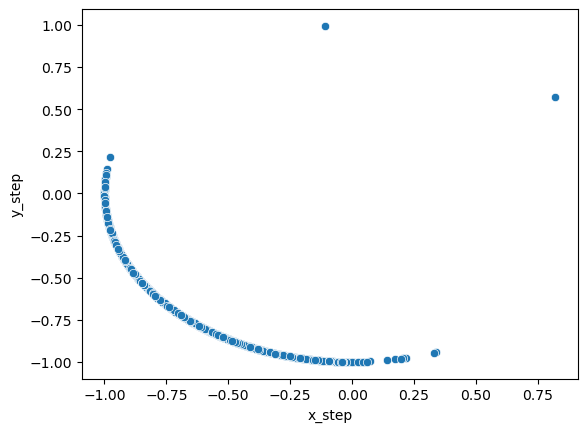

In [12]:
help_df = pd.DataFrame(help_cossim, columns = ['x_step', 'y_step'])
sns.scatterplot(help_df, x = 'x_step', y = 'y_step')
#more diverse goals here--refer to above and other sim

<Axes: xlabel='x_step', ylabel='y_step'>

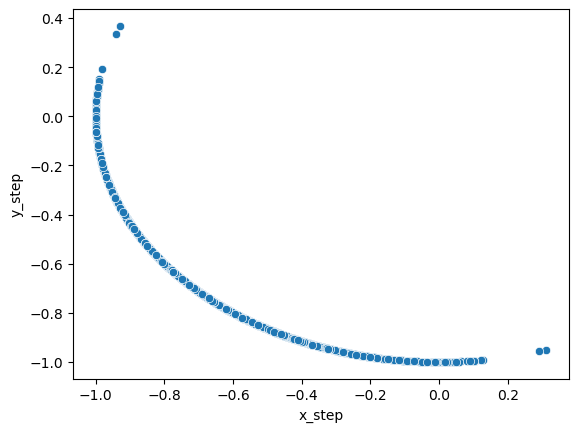

In [13]:
harm_df = pd.DataFrame(harm_cossim, columns = ['x_step', 'y_step'])
sns.scatterplot(harm_df, x = 'x_step', y = 'y_step')
#more diverse goals here--refer to above and other sim

In [14]:
#TRAIN

a_trainrange = help_cossim[1:999]

X = a_trainrange
pca = PCA(2)
 
#Transform the data
df_help = pca.fit_transform(X)

In [15]:
#TRAIN

b_trainrange = harm_cossim[1:999]

X = b_trainrange
pca = PCA(2)
 
#Transform the data
df_harm = pca.fit_transform(X)

In [16]:
#TEST--need pred

Y = np.array(helped[101:400])
pca = PCA(2)
 
#Transform the data
dftest = pca.fit_transform(Y)
 
dftest.shape

(299, 2)

In [17]:
df_help

array([[ 0.26095083, -0.02504328],
       [ 0.0677785 , -0.05934978],
       [ 0.00591571, -0.06223079],
       ...,
       [-0.49096464,  0.06109951],
       [-0.08861808, -0.0592292 ],
       [ 0.4364106 ,  0.04264585]])

In [18]:
df_harm

array([[-0.20552535, -0.03659643],
       [-0.22940918, -0.03101444],
       [-0.18209709, -0.04147652],
       ...,
       [-0.12487868, -0.05096848],
       [-0.39796811,  0.02692751],
       [-0.04875501, -0.05838627]])

In [19]:
df = np.add(df_help, df_harm)

In [20]:
#introduce noise from Helper, Hinderer
clean_signal = pd.DataFrame(df, columns = ('x_step', 'y_step'), dtype=float)

result = map(lambda x, y: abs(x + y), a_trainrange, b_trainrange)
d = list(result)
mu, sigma = 0, d

noise = np.random.normal(mu, sigma, [998, 2])
signal = clean_signal + noise

signal_array = np.array(signal)
signal_df = pd.DataFrame(signal_array, columns = ('x_step', 'y_step'), dtype=float)
signal_df

,x_step,y_step
0,2.144904,-0.580441
1,1.006440,-0.812862
2,0.844463,3.057713
3,1.377106,-0.477922
4,0.468567,2.198031
...,...,...
993,-0.790862,-0.808701
994,0.509428,-3.606490
995,-3.854912,-0.631138
996,0.873922,0.223107


In [21]:
#I need difference between clean and helped/harmed to train my model
effects_df = pd.DataFrame(signal_array, columns = ('x_step_w_effect', 'y_step_w_effect'), dtype = float)
effects_df
#column helped, columns effect of help/harm on x_step:y_step
#compare clean_signal, with x_step:y_step
df1 = pd.concat([clean_signal, effects_df], axis = 1)
df1

,x_step,y_step,x_step_w_effect,y_step_w_effect
0,0.055425,-0.061640,2.144904,-0.580441
1,-0.161631,-0.090364,1.006440,-0.812862
2,-0.176181,-0.103707,0.844463,3.057713
3,0.640612,0.051738,1.377106,-0.477922
4,0.207441,-0.068149,0.468567,2.198031
...,...,...,...,...
993,0.540129,-0.038102,-0.790862,-0.808701
994,-0.103467,-0.071582,0.509428,-3.606490
995,-0.615843,0.010131,-3.854912,-0.631138
996,-0.486586,-0.032302,0.873922,0.223107


<Axes: >

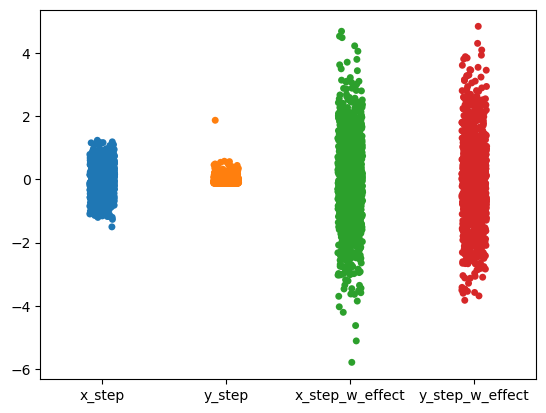

In [22]:
sns.stripplot(data=df1)

#distribution goes wider; this means there is indeed noise

In [23]:
#Game of Life vis here as well

In [24]:
#then, allocate resources according to effects, compared to starting point--requires understanding rules for denoising
#allocate not to bottom of distribution, but cluster and recluster in terms of movement trends
#the LLM will state the allocation when prompted about a row number

In [25]:
#the basic algorithm for the weights
iteredx = np.where(df1['x_step_w_effect'] < 0, abs(df1['x_step'])*10, (df1['x_step_w_effect']) + abs(df1['x_step']))
print(iteredx)
## this weighting makes resource allocation much more uneven (1/df1['x_step'])
##squaring the log clusters at bottom of dist.

##squaring represents outside resources--this is illegal in survival situations, and it tends to prioritize few over others

[ 2.20032962  1.16807102  1.02064442  2.01771836  0.67600785  1.71225415
  3.80595921  3.30231948  4.20753305  2.85753713  1.19858127  1.24777273
  1.35494987  1.49194183  0.41998739  3.53049823  2.26130282  6.62829861
  8.68054042  1.30899447 10.65487869  4.79277717  2.69825419  0.41874172
  4.85050916  0.8216119   8.26748705  3.19040602  3.06201406  0.48230511
  2.16135677  1.10464055  0.23288391  5.30037061  2.18467426  2.71611831
  0.7344293   1.35023685  3.99807576  0.94964083  0.3819262   2.76853767
  6.13100637  0.74021955  1.50332288  1.68742339  1.8333638   2.36939816
  6.00871221  0.18477603  0.67195852  1.36525234  0.7450633   1.51782524
  0.85258091  0.31125354  1.34676412  4.44302727  2.48175245  5.17477937
  0.52666901  8.56615376  4.6235127   5.02425221  1.55061523  1.25194935
  0.75974984  1.25533652  0.64366693  0.53817518  3.9990468   2.09365099
  4.64061402  1.13177376  0.33485831  0.74993973  6.63853511  1.41433924
  0.68220872  1.87771593  2.82766804  1.4963733   1

<Axes: >

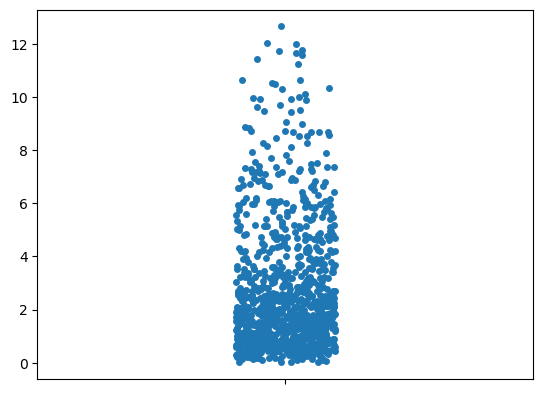

In [26]:
sns.stripplot(data=iteredx)

In [27]:
#the basic algorithm for the weights
iteredy = np.where(df1['y_step_w_effect'] < 0, abs(df1['y_step'])*10, (df1['y_step_w_effect']) + abs(df1['y_step']))
print(iteredy)

[6.16397045e-01 9.03642238e-01 3.16142080e+00 5.17380413e-01
 2.26618014e+00 8.55108977e-01 3.29162162e+00 1.49845891e+00
 7.61352634e-01 9.54817616e-01 6.03107574e-01 2.64985407e+00
 2.92013537e-01 2.17945513e+00 8.76013397e-01 6.96052874e-01
 1.02390330e+00 1.13596677e+00 9.25672174e-01 6.67686213e-01
 1.95997515e+00 2.75458466e-01 2.23678847e-01 1.41071984e-01
 1.45296197e+00 6.04712433e-01 1.09963076e-01 1.49803033e+00
 1.42032817e+00 1.14181185e+00 1.96928743e+00 1.18379793e+00
 1.19869549e+00 2.53180394e+00 1.04015434e+00 8.70534916e-01
 9.31287767e-01 1.79285041e+00 1.20913450e-01 2.27528278e-01
 5.60610164e-01 4.17841225e-01 2.01014171e-01 1.39561279e-01
 9.88883856e-01 2.19107222e-01 1.14060120e+00 7.70537402e-01
 2.96974664e-01 5.43179354e-01 9.87427274e-01 3.65571708e-01
 1.14438171e+00 2.92897921e-01 6.13509180e-01 7.65647507e-01
 7.20417930e-01 7.17629843e-01 3.41278782e-01 1.65310029e+00
 6.58669202e-01 3.50274486e+00 5.02534729e-01 3.08338288e-01
 6.65546615e-01 1.075486

<Axes: >

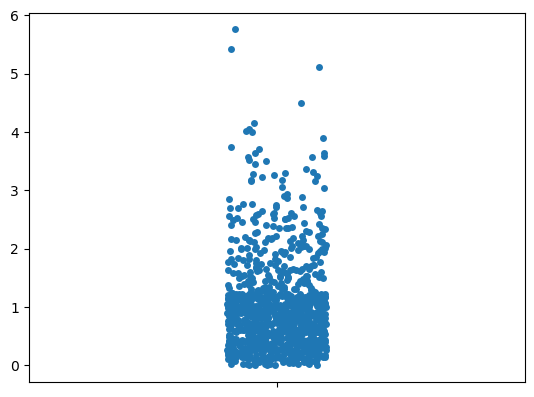

In [28]:
sns.stripplot(data=iteredy)

In [29]:
#the more weighted from the noise, the more "layered" and uneven the results--implies current circumstances alone aren't adequate for optimal compassionate resource allocation
# some better off, some a lot worse off, but leaves stragglers, from weights as either start-state OR noise
#entropy and some irreversibility
#free will in the details
#simple in macro

In [30]:
#if the main term can only be the resource allocations, start and/or end--cannot be simple addition of these, because they have to advance, not just return to start state

In [31]:
negot_x = max(iteredx) - max(iteredy)

In [32]:
logcurvex = iteredx + math.log2(negot_x)
logcurvex

array([ 4.98692363,  3.95466503,  3.80723843,  4.80431237,  3.46260186,
        4.49884816,  6.59255322,  6.08891349,  6.99412706,  5.64413114,
        3.98517528,  4.03436674,  4.14154388,  4.27853584,  3.2065814 ,
        6.31709224,  5.04789683,  9.41489262, 11.46713443,  4.09558848,
       13.4414727 ,  7.57937118,  5.4848482 ,  3.20533573,  7.63710317,
        3.60820591, 11.05408106,  5.97700003,  5.84860807,  3.26889912,
        4.94795078,  3.89123456,  3.01947792,  8.08696462,  4.97126827,
        5.50271232,  3.52102331,  4.13683086,  6.78466977,  3.73623484,
        3.16852021,  5.55513168,  8.91760038,  3.52681356,  4.28991689,
        4.4740174 ,  4.61995781,  5.15599217,  8.79530622,  2.97137004,
        3.45855253,  4.15184635,  3.53165731,  4.30441925,  3.63917492,
        3.09784755,  4.13335813,  7.22962128,  5.26834646,  7.96137338,
        3.31326302, 11.35274777,  7.41010671,  7.81084622,  4.33720924,
        4.03854336,  3.54634385,  4.04193053,  3.43026094,  3.32

In [33]:
logcurvey = iteredy + math.log2(negot_x)
logcurvey

array([3.40299105, 3.69023625, 5.94801482, 3.30397442, 5.05277415,
       3.64170299, 6.07821563, 4.28505292, 3.54794664, 3.74141163,
       3.38970158, 5.43644808, 3.07860755, 4.96604914, 3.66260741,
       3.48264688, 3.81049731, 3.92256078, 3.71226618, 3.45428022,
       4.74656916, 3.06205248, 3.01027286, 2.92766599, 4.23955598,
       3.39130644, 2.89655709, 4.28462434, 4.20692218, 3.92840586,
       4.75588144, 3.97039194, 3.9852895 , 5.31839795, 3.82674835,
       3.65712893, 3.71788178, 4.57944442, 2.90750746, 3.01412229,
       3.34720417, 3.20443524, 2.98760818, 2.92615529, 3.77547787,
       3.00570123, 3.92719521, 3.55713141, 3.08356867, 3.32977336,
       3.77402128, 3.15216572, 3.93097573, 3.07949193, 3.40010319,
       3.55224152, 3.50701194, 3.50422385, 3.12787279, 4.4396943 ,
       3.44526321, 6.28933887, 3.28912874, 3.0949323 , 3.45214062,
       3.86208025, 3.36784563, 3.38642001, 4.79631525, 4.01196376,
       4.22269768, 5.38740406, 2.8550072 , 4.93707844, 3.95770

<Axes: >

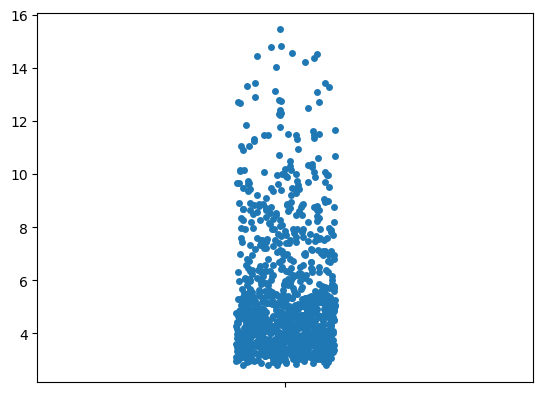

In [34]:
sns.stripplot(logcurvex)
#histplot does not show goal orientation--most have slightly more than min

In [35]:
#negotiate between the best-off and worst-off--exchange while moving forward, to take advantage of irreversibility of the noise
iteredx_negotiate = np.where(iteredx < max(iteredx), max(iteredx), iteredx + math.log2(negot_x))
print(iteredx_negotiate)

[12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188 12.65756188
 12.65756188 12.65756188 12.65756188 12.65756188 12

In [36]:
#negotiate between the best-off and worst-off
iteredy_negotiate = np.where(iteredy < max(iteredy), max(iteredy), iteredy + math.log2(negot_x))
print(iteredy_negotiate)

[5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313
 5.75757313 5.75757313 5.75757313 5.75757313 5.75757313 5.7575

In [37]:
#in reality, altruists give up something to help others; we have only what each data point has to get to be max
#hyperparameters
#not max it could go as negotiated, a goal which helps 1% get even more than that, but max as actually computed, therefore available
#max as computed is where someone has reached towards goal, not goal itself--too much goal orientation helps only the one lucky one

#half what you have to do to get to the goal, divided by the iteration from present to goal--harnessing Zeno's Paradox

speed_helpx = 0

while (speed_helpx < 11):
    speed_helpx = speed_helpx + 1
    optx = np.where(logcurvex > (logcurvex/speed_helpx), max(logcurvex) - (logcurvex/speed_helpx), iteredx + logcurvex/speed_helpx)
    print(optx)

[ 7.18725325  5.12273606  4.82788285  6.82203073  4.13860971  6.21110232
 10.39851243  9.39123296 11.20166012  8.50166826  5.18375656  5.28213947
  5.49649375  5.77047768  3.6265688   9.84759047  7.30919964 16.04319123
 20.14767484  5.40458294 24.09635139 12.37214834  8.18310239  3.62407745
 12.48761234  4.42981781 19.3215681   9.16740606  8.91062212  3.75120424
  7.10930756  4.99587511  3.25236182 13.38733523  7.15594253  8.21883062
  4.25545261  5.48706771 10.78274552  4.68587567  3.5504464   8.32366935
 15.04860674  4.26703311  5.79323977  6.1614408   6.45332162  7.52539032
 14.80401843  3.15614608  4.13051105  5.51709868  4.27672061  5.82224449
  4.49175583  3.40910109  5.48012225 11.67264856  7.7500989  13.13615276
  3.83993203 19.91890152 12.0336194  12.83509842  5.88782446  5.29049271
  4.30609369  5.29726705  4.07392788  3.86294436 10.78468762  6.973896
 12.06782206  5.05014152  3.45631063  4.28647347 16.06366424  5.61527249
  4.15101145  6.54202587  8.44193009  5.77934061  5.5

<Axes: >

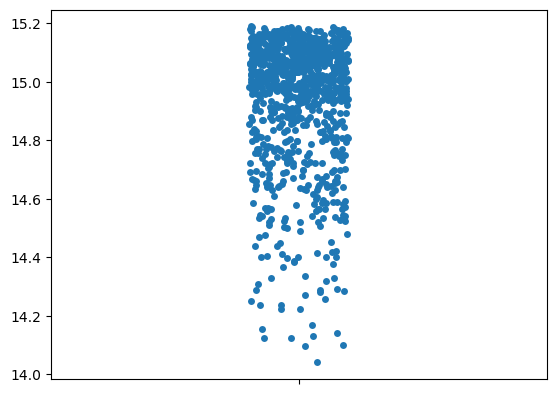

In [38]:
sns.stripplot(optx)
#most have slightly less than max

In [39]:
speed_helpy = 0

while (speed_helpy < 11):
    speed_helpy = speed_helpy + 1
    opty = np.where(logcurvey > (logcurvey/speed_helpy), max(logcurvey) - (logcurvey/speed_helpy), iteredy + logcurvey/speed_helpy)
    print(opty)
#assigning some as Helpers lessened distance between greedy outliers and mass of people; but also more distance between the those with most and least
#iteredy + logcurvey/speed_helpy is the constant

[ 4.0193881   4.59387849  9.10943562  3.82135484  7.31895429  4.49681196
  9.36983725  5.78351183  4.30929928  4.69622924  3.99280916  8.08630215
  3.37062108  7.14550427  4.5386208   4.17869976  4.83440061  5.05852756
  4.63793836  4.12196644  6.70654431  3.33751094  3.2339517   3.06873798
  5.69251796  3.99601888  3.00652016  5.78265466  5.62725035  5.07021771
  6.72516887  5.15418987  5.18398499  7.85020189  4.86690269  4.52766384
  4.64916955  6.37229483  3.02842091  3.24165057  3.90781434  3.62227646
  3.18862235  3.06571657  4.76436172  3.22480845  5.0677964   4.32766881
  3.38054334  3.87295272  4.76144856  3.51773743  5.07535744  3.37238985
  4.01361237  4.31788902  4.22742987  4.2218537   3.46915158  6.09279459
  4.10393241  9.79208373  3.79166347  3.40327059  4.11768724  4.93756649
  3.94909725  3.98624601  6.80603649  5.23733351  5.65880136  7.9882141
  2.92342039  7.08756286  5.12880929  3.23002685  3.3500662   3.6836849
 10.28464237  3.05355489  6.63937922  3.72502439  4.1

<Axes: >

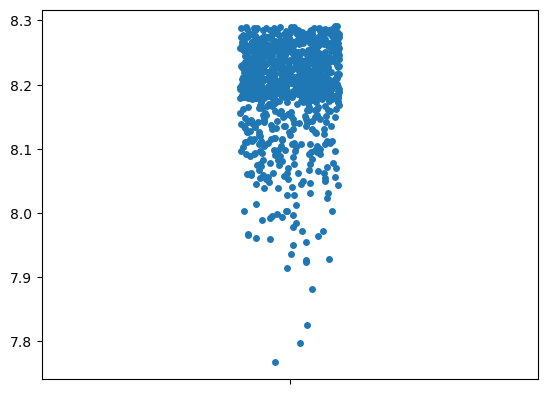

In [40]:
sns.stripplot(opty)
#shows goal orientation better than hists

<Axes: ylabel='Count'>

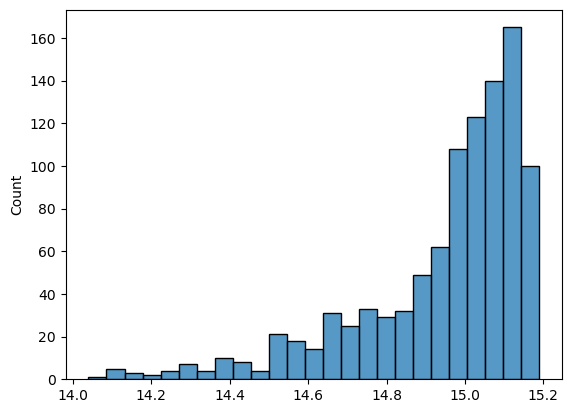

In [41]:
sns.histplot(optx)

<Axes: ylabel='Count'>

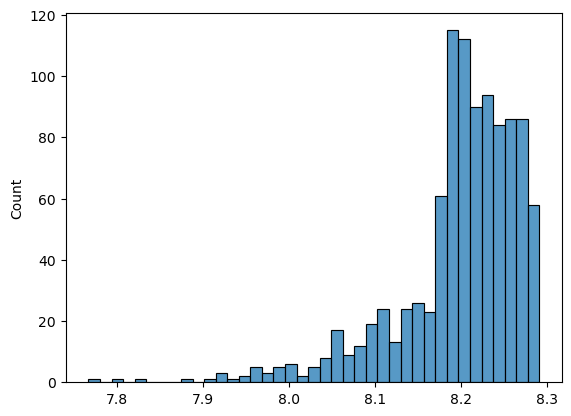

In [42]:
sns.histplot(opty)
#the power of "close enough"

In [43]:
#treat greed as solving dynamic needs; especially since the pattern of trailing mass and greedy leader
#holds from adding the harm to the help, thus combining in the same system

In [44]:
#conservation of energy
#haggling in the bazaar versus set price, which has no movement; instead of arbitrage, the computer provides the lines, people the color
#lines are for safety and facilitation

#this may be a more compelling idea as a simulated behavior, as it requires no expensive equipment to run, unlike OpenAI

In [45]:
#making a constant for the iterations--iterations
#illustrate a narrative case--case of human behavior mimicked with the program--progressive revealed information
#compassion gone right and wrong, simulated by the computer model--how it looks in a real case--what is good about acceptable
#norming, avoid extremes; regulated market; daily limits of trading; rational response to emotional market decisions

In [46]:
#create a text representation of my dataset--ask "how are you?" of each point
#then write to data table in pandas, then it's easy to train an AI to understand that--already solved, nanoGPT?
# more class imbalance, the worse the AI will understand the situation

<Axes: >

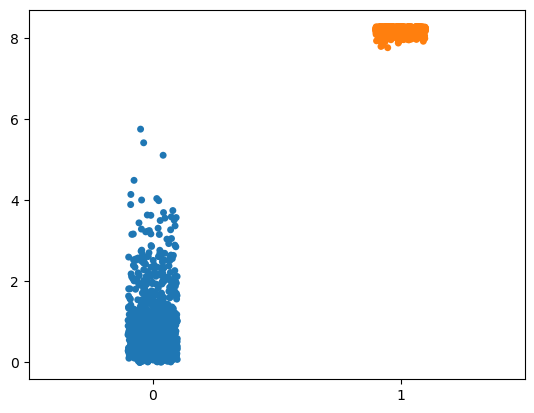

In [47]:
sns.stripplot(data=(iteredy, opty))

<Axes: >

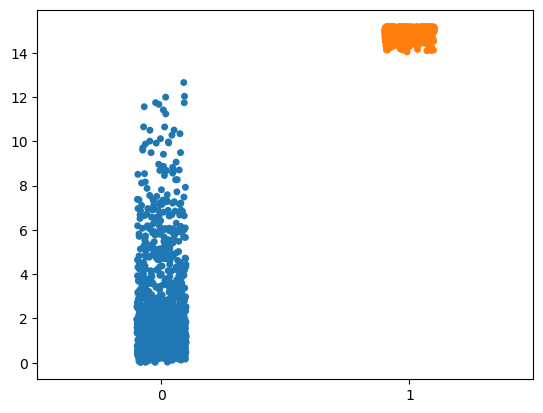

In [48]:
sns.stripplot(data=(iteredx, optx))
#a paradox of group goal direction--we get to goal by orienting to others, not to the goal itself--swarm intelligence?

In [ ]:
import nltk
import evaluate
from datasets import load_dataset
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [49]:
#nanoGPT

#if-else and random choice of sentences; more sophisticated would be a GenAI of these sentiments
great = ["Top of the world!", 
         "Like a million dollars",
         "Oh yeah!", 
         "Almost there!", 
         "Yes!",
         "Success!"]
okay = ["So-so", 
        "Getting there", 
        "Can't complain",
        "Okay",
        "I can do it",
        "I just might make it!"]
poor = ["I need help!", 
        "Still need help", 
        "I can't do it!",
        "Oh ...",
        "Help!",
        "Getting tired"]

In [50]:
import nltk
import evaluate
from datasets import load_dataset
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [85]:
# Load the tokenizer, model, and data collator
MODEL_NAME = "google/flan-t5-base"

tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

prefix = "Please answer this question: "

def answerto():
    #####remember to duplicate for y
    for ox in optx:
        if ox > 15.1:
            input_text = np.random.choice(great)
            text_target = np.random.choice(great)
            input_ids = tokenizer(input_text, return_tensors="pt", padding = True, truncation = True).input_ids
            outputs = model.generate(input_ids)
            print(tokenizer.decode(outputs[0]))
        elif ox < 14:
            input_text = np.random.choice(poor)
            text_target = np.random.choice(poor)
            input_ids = tokenizer(input_text, return_tensors="pt", padding = True, truncation = True).input_ids
            outputs = model.generate(input_ids)
            print(tokenizer.decode(outputs[0]))
        else:
            input_text = np.random.choice(okay)
            text_target = np.random.choice(okay)
            input_ids = tokenizer(input_text, return_tensors="pt", padding = True, truncation = True).input_ids
            outputs = model.generate(input_ids)
            print(tokenizer.decode(outputs[0]))


############data composition

# Check the length of the data and its structure

In [96]:
# We prefix our tasks with "answer the question"

# Define the preprocessing function

answers_qa = answerto()

def preprocess_function(examples):
    """Add prefix to the sentences, tokenize the text, and set the labels"""
    # The "inputs" are the tokenized answer:
    inputs = [prefix + doc for doc in examples["question"]]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)
    
    # The "labels" are the tokenized outputs:
    labels = tokenizer(text_target=examples["answer"], 
                      max_length=512,         
                      truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

/Users/madelinecoven/anaconda3/lib/python3.10/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


<pad> I can do it.</s>
<pad> I'm a fan of a good burger.</s>
<pad>I'm a big fan of the'soup' and's
<pad> I can do it.</s>
<pad> I'm a big fan of the'sooo' thing!</s>
<pad>Okay, so I'm going to be a little bit more sarcastic about
<pad> I'm a fan of a good burger.</s>
<pad>Okay, so I'm going to be a little bit more sarcastic about
<pad>I'm a big fan of the'soup' and's
<pad>Okay, so I'm going to be a little bit more sarcastic about
<pad>Okay, so I'm going to be a little bit more sarcastic about
<pad>I'm a big fan of the'soup' and's
<pad> I can do it.</s>
<pad> I'm a fan of a good burger.</s>
<pad> I'm a big fan of the'sooo' thing!</s>
<pad> I can do it.</s>
<pad> I can do it.</s>
<pad> I'm a fan of a good burger.</s>
<pad>Getting there: Getting there: Getting there: Getting there: Getting there
<pad> So-so</s>
<pad>Getting there: Getting there: Getting there: Getting there: Getting there
<pad> I'm a fan of a good burger.</s>
<pad> So-so</s>
<pad> Is it a good idea to have a sex with your

In [98]:
answerto()

/Users/madelinecoven/anaconda3/lib/python3.10/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


<pad> So-so</s>
<pad> So-so</s>
<pad> So-so</s>
<pad> So-so</s>
<pad> Is it a good idea to have a sex with your partner?</s>
<pad> I can do it.</s>
<pad> I'm a fan of a good burger.</s>
<pad> I can do it.</s>
<pad>Getting there: Getting there: Getting there: Getting there: Getting there
<pad> So-so</s>
<pad> I'm a fan of a good burger.</s>
<pad>I'm a big fan of the'soup' and's
<pad>Getting there: Getting there: Getting there: Getting there: Getting there
<pad>I'm a big fan of the'soup' and's
<pad> I'm almost there!</s>
<pad>Okay, so I'm going to be a little bit more sarcastic about
<pad> I can do it.</s>
<pad>Getting there: Getting there: Getting there: Getting there: Getting there
<pad>I'm a big fan of the'soup' and's
<pad> So-so</s>
<pad> I'm a fan of a good burger.</s>
<pad> So-so</s>
<pad> I'm a fan of a good burger.</s>
<pad> i love you i love you</s>
<pad>Getting there: Getting there: Getting there: Getting there: Getting there
<pad> i love you i love you</s>
<pad>Okay, so I'm go

In [1]:
answers_qa = pd.DataFrame(answers_qa)
answers_qa

NameError: name 'pd' is not defined

In [94]:
answers_qa = answers_qa["train"].train_test_split(test_size=0.3)

# Map the preprocessing function across our dataset
tokenized_dataset = answers_qa.map(preprocess_function, batched=True)

KeyError: 'train'

In [ ]:
nltk.download("punkt", quiet=True)
metric = evaluate.load("rouge")

In [ ]:
def compute_metrics(eval_preds):
    preds, labels = eval_preds
    # decode preds and labels
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # rougeLSum expects newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]
    
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    return result

In [ ]:
# Global Parameters
L_RATE = 3e-4
BATCH_SIZE = 8
PER_DEVICE_EVAL_BATCH = 4
WEIGHT_DECAY = 0.01
SAVE_TOTAL_LIM = 3
NUM_EPOCHS = 3

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
   output_dir="./results",
   evaluation_strategy="epoch",
   learning_rate=L_RATE,
   per_device_train_batch_size=BATCH_SIZE,
   per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH,
   weight_decay=WEIGHT_DECAY,
   save_total_limit=SAVE_TOTAL_LIM,
   num_train_epochs=NUM_EPOCHS,
   predict_with_generate=True,
   push_to_hub=False
)

In [ ]:
trainer = Seq2SeqTrainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_dataset["train"],
   eval_dataset=tokenized_dataset["test"],
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

trainer.train()

In [ ]:
last_checkpoint = "./results/checkpoint-22500"

finetuned_model = T5ForConditionalGeneration.from_pretrained(last_checkpoint)
tokenizer = T5Tokenizer.from_pretrained(last_checkpoint)

In [ ]:
my_question = "How are you feeling?"
inputs = "Please answer to this question: " + my_question

In [ ]:
inputs = tokenizer(inputs, return_tensors="pt")
outputs = finetuned_model.generate(**inputs)
answer = tokenizer.decode(outputs[0])
from textwrap import fill

print(fill(res, width=80))

In [5]:
from transformers import AutoModelForSeq2SeqLM
from transformers import AutoTokenizer
model_name = 'google/flan-t5-base'
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

dialogue= np.random.choice(great)
inputs = tokenizer(dialogue, return_tensors='pt')
output = tokenizer.decode(
    model.generate(inputs["input_ids"],max_new_tokens=50)[0],
    skip_special_tokens=True
)

print(f'MODEL GENERATION :\n{output}')


/Users/madelinecoven/anaconda3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


MODEL GENERATION :
I'm a big fan of the'sooo' thing!


In [ ]:
#with my tool, patients are helped by triage--build a story to show the prototype